<a href="https://colab.research.google.com/github/rafiag/DTI2020/blob/main/005_Clustering_Customer_Segmenting_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Data Science Course - Telkom Digital Talent Incubator*


---




# **Clustering**

Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups (clusters).

Here we model the clustering from customer income and spend data. We use this model to perform customer segmentation. We differentiate customers into the optimum number of groups based on their shared income and spend.

### **Import Libraries**

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Import Raw Dataset**

In [2]:
# Import Dataset
df_income = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/bigdatacertification/master/dataset/clustering.csv')
df_income

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163
...,...,...
298,241,123
299,264,132
300,193,141
301,131,115


In [3]:
# Prints the Dataset Information
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


In [4]:
# Prints Descriptive Statistics
df_income.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
INCOME,303.0,245.273927,48.499412,126.0,211.0,240.0,274.0,417.0
SPEND,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0


### **Data Preprocessing**

First, we standardize the data to equalize the range and/or data variability. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance. 

In [5]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = df_income.columns.tolist()
df_income[column_names] = scaler.fit_transform(df_income[column_names])
df_income.sort_index(inplace=True)
df_income

,INCOME,SPEND
0,-0.253492,0.015443
1,0.097607,1.633471
2,-0.852427,0.977514
3,-0.191534,1.239897
4,2.245510,0.583939
...,...,...
298,-0.088269,-1.165281
299,0.386748,-0.771706
300,-1.079609,-0.378132
301,-2.360090,-1.515125


### **Data Visualization**

Text(0, 0.5, 'Annual Spend')

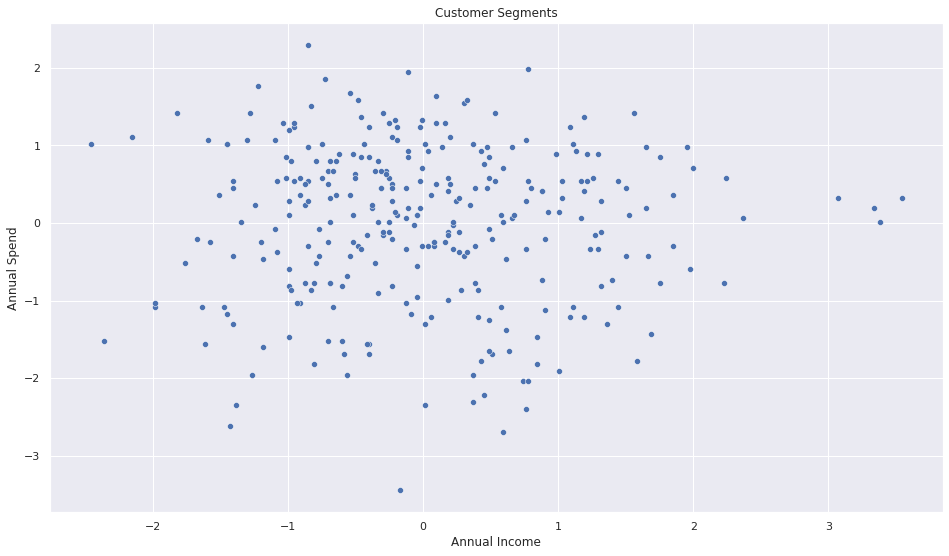

In [6]:
# Styling Plot
sns.set() 
plt.rcParams['figure.figsize'] = (16, 9)

# Visualizing the Data
sns.scatterplot(x='INCOME', y='SPEND', data=df_income)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

## **K-Means Clustering**

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

### **Search for the Optimum Number of Clusters (k)**

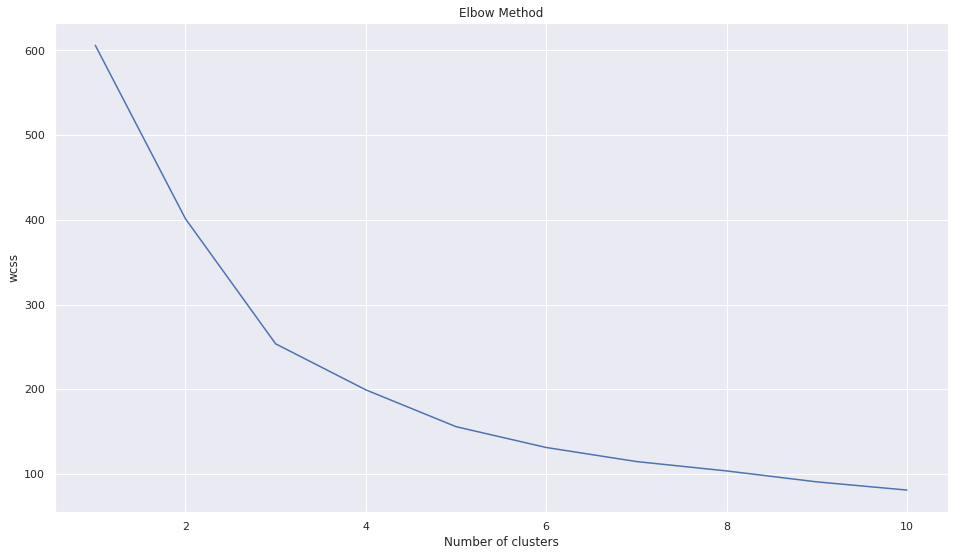

In [7]:
# Transform Data Frame to Numpy Array
income = df_income.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [8]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.33405880592916115
For n_clusters=3, The Silhouette Coefficient is 0.36841383808230366
For n_clusters=4, The Silhouette Coefficient is 0.36121636411608343
For n_clusters=5, The Silhouette Coefficient is 0.3476681196845242
For n_clusters=6, The Silhouette Coefficient is 0.35840898404030647
For n_clusters=7, The Silhouette Coefficient is 0.35990857125564857
For n_clusters=8, The Silhouette Coefficient is 0.3582903521958359
For n_clusters=9, The Silhouette Coefficient is 0.3588958803459938
For n_clusters=10, The Silhouette Coefficient is 0.34247903441073846


### **Modeling K-Means**

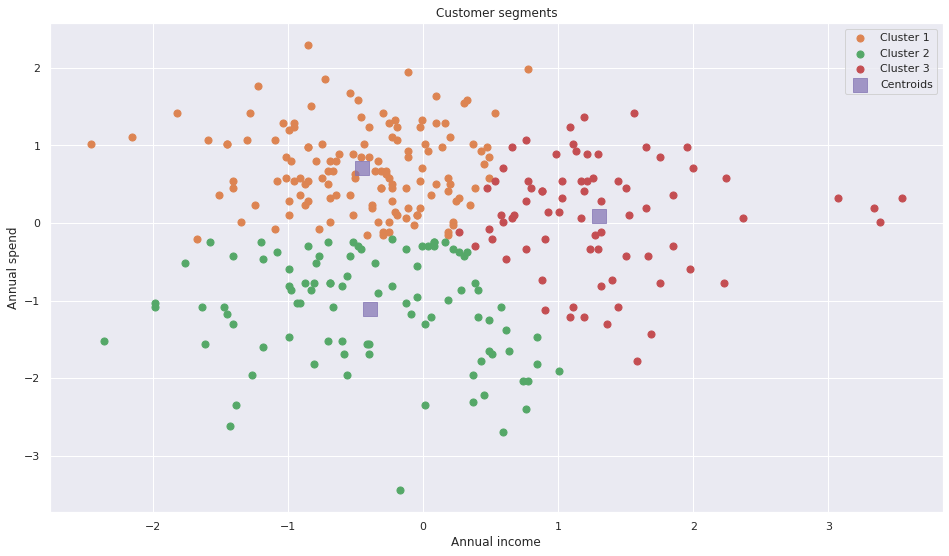

In [9]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='INCOME', y='SPEND', data=df_income)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[cluster == 2, 0], income[cluster == 2, 1], s = 50, label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

In [10]:
# Add Cluster Information to the Raw Data
df_income['cluster'] = cluster
df_income

,INCOME,SPEND,cluster
0,-0.253492,0.015443,0
1,0.097607,1.633471,0
2,-0.852427,0.977514,0
3,-0.191534,1.239897,0
4,2.245510,0.583939,2
...,...,...,...
298,-0.088269,-1.165281,1
299,0.386748,-0.771706,1
300,-1.079609,-0.378132,1
301,-2.360090,-1.515125,1


In [11]:
# Save= Result
df_income.to_csv('income_clusters.csv', index=False)

## **Hierarchical Clustering**

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

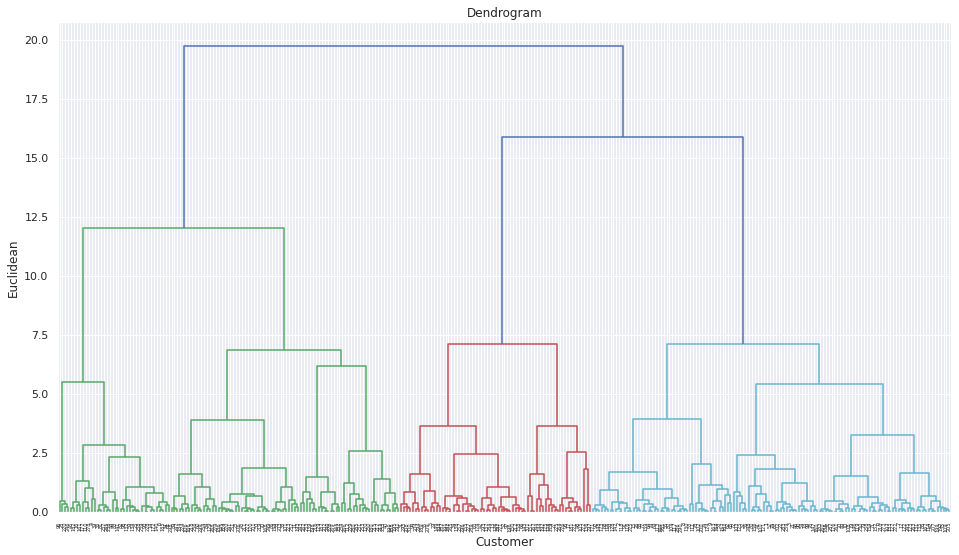

In [12]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

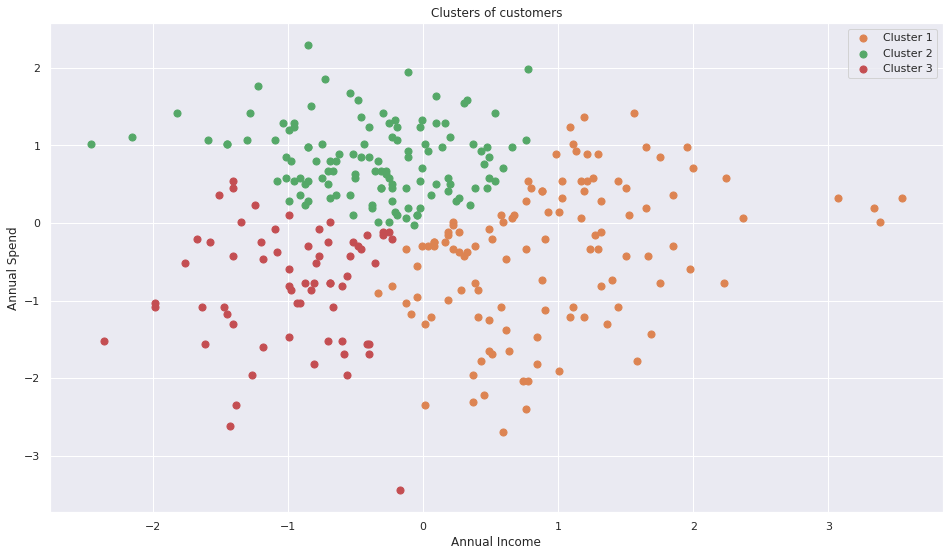

In [13]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=3
sns.scatterplot(x='INCOME', y='SPEND', data=df_income)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.scatter(income[hcluster == 2, 0], income[hcluster == 2, 1], s = 50, label = 'Cluster 3')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()